In [14]:
import urllib3
import numpy
import pandas as pd
import matplotlib
import seaborn as sns
from datetime import datetime
import requests
import os
import re
print("All libs imported")

All libs imported


In [68]:
# # don`t working 
# # Define the URL and the necessary headers and parameters
# url = 'https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php'
# headers = {'Cookie': "_ga=GA1.4.818944583.1677526392; _gid=GA1.4.135115810.1677701115"}
# params = {'country': 'UKR', 'provinceID': '12', 'year1': '1981', 'year2': '2023', 'type': 'Mean'}

# # Create a connection pool and send the request with the headers and parameters
# http = urllib3.PoolManager()
# response = http.request('GET', url, fields=params, headers=headers)
# print(response.status)
# content = response.read()
# print(content)
# # now = datetime.now()
# # date_and_time_time = now.strftime("%d%m%Y%H%M%S") 
# # out = open(f"obl_12_{date_and_time_time}.csv",'wb')
# # out.write(content)
# # out.close



In [84]:
url = 'https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php'
for i in range(1,28):
    params = {'country': 'UKR', 'provinceID': str(i), 'year1': '1981', 'year2': '2023', 'type': 'Mean'}
    response = requests.get(url, params=params)#, headers=headers)
    content = response.content
    content = content.replace(b'<tt><pre>', b'')
    content = content.replace(b'</pre></tt>', b'')
    now = datetime.now()
    date_and_time_time = now.strftime("%d%m%Y%H%M%S") 
    out = open(f"frames/obl_{i}_{date_and_time_time}.csv",'wb')
    out.write(content)
    out.close
print("Data downloaded")

Data downloaded


In [18]:
dir = "frames"
dflist = []
for filename in os.listdir(dir):
    province = re.search(r"obl_(\d+)_\d+", filename).group(1)
    filename = f"{dir}/{filename}"
    headers = ['Year', 'Week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'empty'] 
    df = pd.read_csv(filename, header = 1, names = headers)
    df = df.drop(columns=['empty'])
    df['province'] = province
    dflist.append(df)

df=dflist[0]    
for dfi in dflist[1:]:
    df = pd.concat([df, dfi], ignore_index=True)
    
df
# df = df.drop(df.loc[df['VHI'] == -1].index)
# print(list(df.columns.values))
# drop last row
# df = df.drop(index=df.index[-1])

# drop last column
# df = df.drop(columns=['empty'])

# #add province
# df['province']=13
# print(df[-10:])
# # df[(df['Year']=='2000')&(df['Week']==18)]

,Year,Week,SMN,SMT,VCI,TCI,VHI,province
0,1982,1,0.059,258.24,51.11,48.78,49.95,10
1,1982,2,0.063,261.53,55.89,38.20,47.04,10
2,1982,3,0.063,263.45,57.30,32.69,44.99,10
3,1982,4,0.061,265.10,53.96,28.62,41.29,10
4,1982,5,0.058,266.42,46.87,28.57,37.72,10
...,...,...,...,...,...,...,...,...
58963,2023,48,-1.000,-1.00,-1.00,-1.00,-1.00,9
58964,2023,49,-1.000,-1.00,-1.00,-1.00,-1.00,9
58965,2023,50,-1.000,-1.00,-1.00,-1.00,-1.00,9
58966,2023,51,-1.000,-1.00,-1.00,-1.00,-1.00,9


Year        0
Week        0
SMN         0
SMT         0
VCI         0
TCI         0
VHI         0
province    0
dtype: int64


C:\Users\vovap\AppData\Local\Temp\ipykernel_5916\2742841992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['province'],kde=False,bins=27)


<Axes: xlabel='province'>

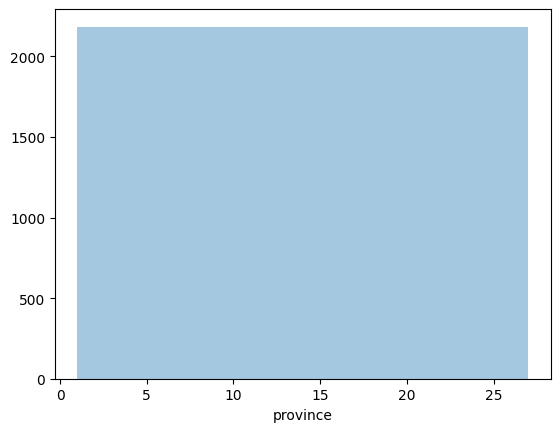

In [19]:
print(df.isnull().sum())
sns.distplot(df['province'],kde=False,bins=27)

In [5]:
# df[(df['province']=='23')]
text=""" 1: Cherkasy
2: Chernihiv
3: Chernivtsi
4: Crimea
5: Dnipropetrovs'k
6: Donets'k
7: Ivano-Frankivs'k
8: Kharkiv
9: Kherson
10: Khmel'nyts'kyy
11: Kiev
12: Kiev City
13: Kirovohrad
14: Luhans'k
15: L'viv
16: Mykolayiv
17: Odessa
18: Poltava
19: Rivne
20: Sevastopol'
21: Sumy
22: Ternopil'
23: Zakarpathia
24: Vinnytsya
25: Volyn
26: Zaporizhzhya
27: Zhytomyr"""
province_ids = {}
for line in text.split('\n'):
    if line.strip():
        value = line.split(':')[1].strip()
        key = line.split(':')[0].strip()
        province_ids[key] = value

print(province_ids)

{'1': 'Cherkasy', '2': 'Chernihiv', '3': 'Chernivtsi', '4': 'Crimea', '5': "Dnipropetrovs'k", '6': "Donets'k", '7': "Ivano-Frankivs'k", '8': 'Kharkiv', '9': 'Kherson', '10': "Khmel'nyts'kyy", '11': 'Kiev', '12': 'Kiev City', '13': 'Kirovohrad', '14': "Luhans'k", '15': "L'viv", '16': 'Mykolayiv', '17': 'Odessa', '18': 'Poltava', '19': 'Rivne', '20': "Sevastopol'", '21': 'Sumy', '22': "Ternopil'", '23': 'Zakarpathia', '24': 'Vinnytsya', '25': 'Volyn', '26': 'Zaporizhzhya', '27': 'Zhytomyr'}


In [20]:
df['province']=df['province'].map(province_ids)
df

,Year,Week,SMN,SMT,VCI,TCI,VHI,province
0,1982,1,0.059,258.24,51.11,48.78,49.95,Khmel'nyts'kyy
1,1982,2,0.063,261.53,55.89,38.20,47.04,Khmel'nyts'kyy
2,1982,3,0.063,263.45,57.30,32.69,44.99,Khmel'nyts'kyy
3,1982,4,0.061,265.10,53.96,28.62,41.29,Khmel'nyts'kyy
4,1982,5,0.058,266.42,46.87,28.57,37.72,Khmel'nyts'kyy
...,...,...,...,...,...,...,...,...
58963,2023,48,-1.000,-1.00,-1.00,-1.00,-1.00,Kherson
58964,2023,49,-1.000,-1.00,-1.00,-1.00,-1.00,Kherson
58965,2023,50,-1.000,-1.00,-1.00,-1.00,-1.00,Kherson
58966,2023,51,-1.000,-1.00,-1.00,-1.00,-1.00,Kherson


In [21]:
print(df.isnull().sum())

Year        0
Week        0
SMN         0
SMT         0
VCI         0
TCI         0
VHI         0
province    0
dtype: int64


In [119]:
sel_prov="Kiev City"
sel_year=2023
selected=(df[(df['province']==sel_prov)&(df['Year']==sel_year)&(df['VHI']!=-1)][["Week","VHI"]])
min_vhi=selected.loc[selected['VHI'].idxmin()].to_dict()
max_vhi=selected.loc[selected['VHI'].idxmax()].to_dict()
print(f'Selected: Province = {sel_prov}, Year = {sel_year}\n\n',selected)
print(f'\nMIN VHI: {min_vhi}\nMAX VHI: {max_vhi} ')

Selected: Province = Kiev City, Year = 2023

       Week    VHI
6500     1  38.50
6501     2  39.52
6502     3  41.44
6503     4  46.18
6504     5  47.89
6505     6  47.72
6506     7  47.18
6507     8  48.47

MIN VHI: {'Week': 1.0, 'VHI': 38.5}
MAX VHI: {'Week': 8.0, 'VHI': 48.47} 


In [178]:
sel_prov="Kiev City"
selected=(df[(df['province']==sel_prov)&(df['VHI']!=-1)][['Year',"Week","VHI"]])
print(f'Selected Province: {sel_prov}\n',selected.head().to_string(index=False))
# Процент сильних посух в кожному році
percent_extreme_vhi_by_year=selected.groupby('Year')['VHI'].apply(lambda x: (x < 15).mean()*100)
# print(percent_extreme_vhi_by_year)
# Вказаний процент 
year_percent = 15 
extreme_vhi=percent_extreme_vhi_by_year.apply(lambda x: f"extreme VHI(%): {x:.1f}" if x > year_percent else None)
print(f"\nРоки з екстримальними посухами: (% екстримальних посух в році > {year_percent}%)\n",extreme_vhi.dropna().to_string())


Selected Province: Kiev City
  Year  Week   VHI
 1982     1 44.85
 1982     2 40.95
 1982     3 39.52
 1982     4 39.39
 1982     5 41.34

Роки з екстримальними посухами: (% екстримальних посух в році > 15%)
 Year
2000    extreme VHI(%): 19.2


In [181]:
# Процент помірних посух в кожному році
percent_middle_vhi_by_year=selected.groupby('Year')['VHI'].apply(lambda x: ((x > 15)&(x < 35)).mean()*100)
# Вказаний процент 
year_percent = 20
middle_vhi=percent_middle_vhi_by_year.apply(lambda x: f"middle VHI(%): {x:.1f}" if x > year_percent else None)
print(f"\nРоки з помірними посухами: (% помірних посух в році > {year_percent}%)\n",middle_vhi.dropna().to_string())



Роки з помірними посухами: (% помірних посух в році > 20%)
 Year
1985    middle VHI(%): 20.5
1986    middle VHI(%): 40.4
1989    middle VHI(%): 26.9
1992    middle VHI(%): 26.9
1995    middle VHI(%): 24.5
2000    middle VHI(%): 23.1
2009    middle VHI(%): 21.2
2010    middle VHI(%): 26.9
